In [2]:
import os
import numpy as np
import matplotlib.pyplot  as plt 
import sys
import subprocess
subprocess.run(["ls", "-l"])

CompletedProcess(args=['ls', '-l'], returncode=0)

In [3]:
os.system("cd 100_0; for i in 100_0-Solvated.out 100_1-Solvated.out 100_4-Solvated.out; do grep 'G =' $i | tail -1; done")

0

In [4]:
os.system("ls")

0

In [5]:
from subprocess import Popen, PIPE

def run(cmd):
    #print('-'*40)
    #print('running:', cmd)
    p = Popen(cmd, stderr=PIPE, stdout=PIPE, shell=True)
    output, errors = p.communicate()
    #print([p.returncode, errors, output])
    if p.returncode or errors:
        print('something went wrong...',errors)
    return output    

Barriers=[]
for i in ["0","1","2","3"]:
    print(i)
    a=run("cd 100_"+i+"; for i in 100_0-Solvated.out 100_1-Solvated.out 100_4-Solvated.out; do grep 'F =' $i | tail -1; done")
    print(a)

0
b'        F =    -1802.6689150699460242\n        F =                      -nan\n        F =    -1819.3012818467047964\n'
1
b'        F =    -1802.6962804523277555\n        F =    -1819.9308215274340910\n        F =    -1819.3284639646640244\n'
2
b'        F =    -1802.7164830447177337\n        F =    -1819.9529098946334216\n        F =    -1819.3442360329177063\n'
3
b'        F =    -1802.7127253676521832\n        F =    -1819.9483685040374894\n        F =    -1819.3388141199204711\n'


In [6]:
Barriers=[[ -1802.6686225217008541, -1819.9072729216518383, -1819.3010150161990168],[-1802.6962804523277555, -1819.9308215274340910, -1819.3284639646640244],[ -1802.7164830447177337,  -1819.9529098946334216,  -1819.3442360329177063],[-1802.7127253676521832,  -1819.9483685040374894,  -1819.338814119920471]]

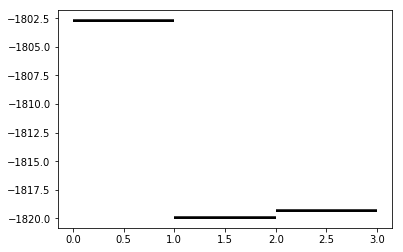

In [7]:
plt.hlines(Barriers[0], [0,1,2], [1,2,3])
plt.hlines(Barriers[1], [0,1,2], [1,2,3])
plt.hlines(Barriers[2], [0,1,2], [1,2,3])
plt.hlines(Barriers[3], [0,1,2], [1,2,3])

In [75]:
#energy of H3O+ -17.7059695738916965 (no strain box)
#energy of water -17.2804343656070181 (no strain box)
#solvation energy -6.32/627.509
#heat of vaporization  -9.72/627.509
Correctionextrawater= -17.2804343656070181 -6.32/627.509   -9.72/627.509 # in hartree
CorrectionextraH=(-17.7059695738916965+17.2804343656070181) #-0.826923405  #-183.70/627.509    # in hartree

# convert to ev
Barriers_p=27.2114*np.array([[ -1802.6686225217008541+Correctionextrawater, -1819.9072729216518383, -1819.3010150161990168+CorrectionextraH],[-1802.6962804523277555+Correctionextrawater, -1819.9308215274340910, -1819.3284639646640244+CorrectionextraH],[ -1802.7164830447177337+Correctionextrawater,  -1819.9529098946334216,  -1819.3442360329177063+CorrectionextraH],[-1802.7127253676521832+Correctionextrawater,  -1819.9483685040374894,  -1819.338814119920471+CorrectionextraH]])
Barriers_p=Barriers_p-min(Barriers_p.flatten())

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text yticklabel objects>)

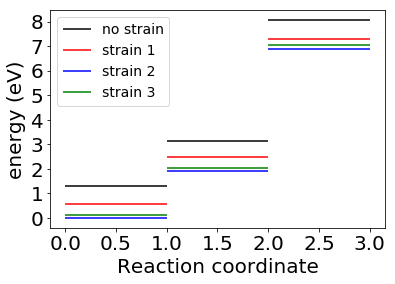

In [76]:
plt.hlines(Barriers_p[0], [0,1,2], [1,2,3],color='k' , label='no strain')
plt.hlines(Barriers_p[1], [0,1,2], [1,2,3],color='r' , label='strain 1')
plt.hlines(Barriers_p[2], [0,1,2], [1,2,3],color='b',label='strain 2')
plt.hlines(Barriers_p[3], [0,1,2], [1,2,3],color='g',label='strain 3 ')
plt.legend(loc='upper left', prop={'size' : 14})
plt.xlabel(r'Reaction coordinate', size=20)
plt.ylabel(r'energy (eV)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

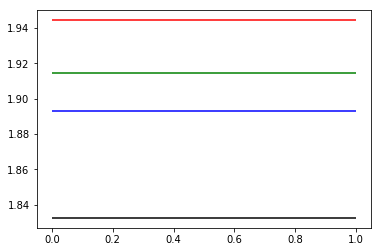

In [57]:
plt.hlines(Barriers_p[0][1]-Barriers_p[0][0], [0,1,2], [1,2,3],color='k')
plt.hlines(Barriers_p[1][1]-Barriers_p[1][0], [0,1,2], [1,2,3],color='r')
plt.hlines(Barriers_p[2][1]-Barriers_p[2][0], [0,1,2], [1,2,3],color='b')
plt.hlines(Barriers_p[3][1]-Barriers_p[3][0], [0,1,2], [1,2,3],color='g')

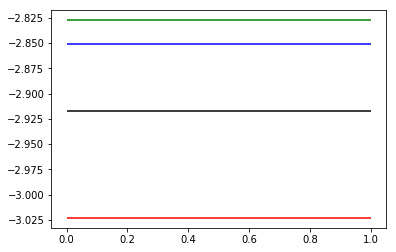

In [46]:
plt.hlines(Barriers_p[0][2]-Barriers_p[0][1], [0,1,2], [1,2,3],color='k')
plt.hlines(Barriers_p[1][2]-Barriers_p[1][1], [0,1,2], [1,2,3],color='r')
plt.hlines(Barriers_p[2][2]-Barriers_p[2][1], [0,1,2], [1,2,3],color='b')
plt.hlines(Barriers_p[3][2]-Barriers_p[3][1], [0,1,2], [1,2,3],color='g')

In [11]:
np.array([24.45148,  8.15049,  8.15049])*1.88973

array([46.2066953 , 15.40222547, 15.40222547])

In [12]:
np.array([23.05308,  5.76327,  8.15049])*1.88973

array([43.56409687, 10.89102422, 15.40222547])

In [13]:
np.array([5.76327,  9.98227, 21.17560])*1.88973

array([10.89102422, 18.86379509, 40.01616659])

In [74]:
#energy of the formic acid by itself

EFA=-38.9701105660301224